In [1]:
#importing libraries
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
#reading csv file
healthcare_dataset = pd.read_csv("D:/Sem 6 - Study Materials/Machine_Learning/SA/Healthcare_Investments_and_Hospital_Stay.csv")
print(healthcare_dataset)

    Location  Time  Hospital_Stay  MRI_Units  CT_Scanners  Hospital_Beds
0        AUS  1992            6.6       1.43        16.71           1.43
1        AUS  1994            6.4       2.36        18.48           2.36
2        AUS  1995            6.5       2.89        20.55           2.89
3        AUS  1996            6.4       2.96        21.95           2.96
4        AUS  1997            6.2       3.53        23.34           3.53
..       ...   ...            ...        ...          ...            ...
513      LTU  2014            6.8      10.57        22.17          10.57
514      LTU  2015            6.6      11.02        21.00          11.02
515      LTU  2016            6.6      12.20        23.01          12.20
516      LTU  2017            6.5      12.37        23.33          12.37
517      LTU  2018            6.5      12.49        24.27          12.49

[518 rows x 6 columns]


In [3]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column])
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [4]:
def preprocess_inputs(df):
    df = df.copy()
    
    # One-hot encode Location column
    df = onehot_encode(df, column='Location')
    #print(df)
    # Split df into X and y
    y = df['Hospital_Stay'].copy()
    X = df.drop('Hospital_Stay', axis=1).copy()
    
    #splitting into train and test dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)
    
    #Scale X with a standard scaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    
    return X_train, X_test, y_train, y_test

In [5]:
X_train, X_test, y_train, y_test = preprocess_inputs(healthcare_dataset)

In [6]:
X_train

,Time,MRI_Units,CT_Scanners,Hospital_Beds,AUS,AUT,BEL,CAN,CZE,DEU,...,LVA,NLD,NZL,POL,PRT,RUS,SVK,SVN,TUR,USA
0,-0.303643,0.502340,-0.349986,0.502340,-0.207913,-0.207913,-0.177028,-0.215041,-0.207913,-0.16855,...,-0.193001,-0.177028,-0.159674,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
1,-0.738679,-0.697320,-0.873325,-0.697320,-0.207913,-0.207913,-0.177028,-0.215041,-0.207913,-0.16855,...,-0.193001,-0.177028,-0.159674,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
2,0.131392,-0.562147,-0.392384,-0.562147,-0.207913,-0.207913,-0.177028,-0.215041,4.809712,-0.16855,...,-0.193001,-0.177028,-0.159674,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
3,0.276404,-0.018076,-0.295665,-0.018076,-0.207913,-0.207913,-0.177028,-0.215041,-0.207913,-0.16855,...,-0.193001,-0.177028,6.262765,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
4,1.001462,1.174825,1.272365,1.174825,-0.207913,-0.207913,-0.177028,-0.215041,-0.207913,-0.16855,...,-0.193001,-0.177028,-0.159674,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,1.146474,-0.248996,-0.302952,-0.248996,-0.207913,-0.207913,-0.177028,-0.215041,4.809712,-0.16855,...,-0.193001,-0.177028,-0.159674,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
358,0.276404,-0.678170,-0.378472,-0.678170,-0.207913,-0.207913,-0.177028,-0.215041,-0.207913,-0.16855,...,-0.193001,-0.177028,-0.159674,5.648813,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
359,-0.013620,-0.589181,-0.850140,-0.589181,-0.207913,-0.207913,-0.177028,-0.215041,-0.207913,-0.16855,...,-0.193001,-0.177028,-0.159674,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
360,-0.013620,-0.317709,-0.623580,-0.317709,-0.207913,-0.207913,-0.177028,-0.215041,-0.207913,-0.16855,...,-0.193001,-0.177028,-0.159674,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,5.181327,-0.140422


In [7]:
Y = y_train.append(y_test)
Y

121     7.2
378     7.3
91      6.7
310     6.1
479     5.9
       ... 
329     6.6
385     6.0
79      7.5
172     5.6
439    14.0
Name: Hospital_Stay, Length: 518, dtype: float64

In [8]:
Y_new = Y.tolist()

In [9]:
X_whole = pd.concat([X_train, X_test])

In [10]:
X_whole.insert(36, "Hospital Stay", Y_new, True)

In [11]:
#creating dataframes with limited features
X_lim = pd.DataFrame(X_whole[['Time', 'CT_Scanners', 'AUS', 'DEU', 'DNK', 'FRA', 'ISR', 'JPN', 'KOR', 'RUS', 'TUR', 'USA']], columns =['Time', 'CT_Scanners', 'AUS', 'DEU', 'DNK', 'FRA', 'ISR', 'JPN', 'KOR', 'RUS', 'TUR', 'USA'])
Y_lim = X_whole['Hospital Stay']

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X_lim, Y_lim, test_size = 0.3, random_state=123)  #splitting data into train and test set
trindex=list(X_train.index)
teindex=list(X_test.index)

#converting into array
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_test=np.array(X_test)
Y_test=np.array(Y_test)
X_test1=X_test

In [13]:
#printing shape of array
print("\nshape of X_train is: ",X_train.shape)
print("shape of Y_train is: ",Y_train.shape)
print("shape of X_test is: ",X_test.shape)
print("shape of Y_test is: ",Y_test.shape)


shape of X_train is:  (362, 12)
shape of Y_train is:  (362,)
shape of X_test is:  (156, 12)
shape of Y_test is:  (156,)


In [14]:
dummy=(np.ones([362,1],dtype=int)) 

# concatenating 1's for intercept calculation
X_train=np.concatenate((dummy,X_train),axis=1) 

dummy_test=(np.ones([156,1],dtype=int))

# concatenating 1's for intercept calculation
X_test=np.concatenate((dummy_test,X_test),axis=1)

In [31]:
print("\n1. Stochastic Gradient Descent")
print("2. Batch Gradient Descent")

ch=eval(input("\nEnter your choice "))
epochs=350


1. Stochastic Gradient Descent
2. Batch Gradient Descent

Enter your choice 1


In [32]:
#Mean-Squared-Error loss
def calculate_error(theta):
    error=0
    for i in range(Y_train.shape[0]):
        error+=np.square(np.dot(theta.transpose(),X_train[i])-Y_train[i])
    mse=error/(2*Y_train.shape[0])
    return mse

In [33]:
#array with random values of coefficients
theta=np.random.rand(13,1) 

# array for storing updated value of theta
temp=np.ndarray([13,1]) 

#learning rate
alpha=0.016

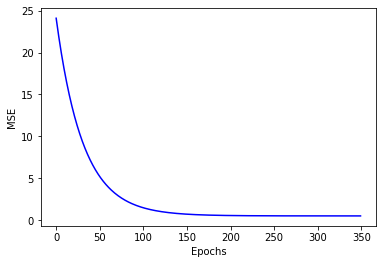

initial value of mean square error was:  [24.09566772]
reduced value of mean square error is:  [0.49771667]


In [34]:
#gradient descent calculation
if ch==1:
    y=[]
    for epoch in range(epochs):
        for j in range(13):
            dif=0
            for i in range(Y_train.shape[0]):
                dif+=(np.dot(theta.transpose(),X_train[i].reshape([13,1])) - Y_train[i])*X_train[i][j]
            temp[j] = theta[j] - (alpha/362)*(dif)
            theta=temp   
        y.append(calculate_error(theta))
    plt.xlabel("Epochs")
    plt.ylabel("MSE")
    x=np.arange(0,epochs)
    plt.plot(x,y,color='b')
    plt.show()
if ch==2:
    y=[]
    for epoch in range(epochs):
        for j in range(13):
            dif=0
            for i in range(Y_train.shape[0]):
                dif+=(np.dot(theta.transpose(),X_train[i].reshape([13,1])) - Y_train[i])*X_train[i][j]
            temp[j] = theta[j] - (alpha/362)*(dif)
        theta=temp
        y.append(calculate_error(theta))
    plt.xlabel("Epochs")
    plt.ylabel("MSE")
    x=np.arange(0,epochs)
    plt.plot(x,y,color='b')
    plt.show()
print("initial value of mean square error was: ",y[0])
print("reduced value of mean square error is: ",y[(len(y)-1)])

In [40]:
#calculation of average percentage error in predicted LOS for train set
per=[]
for i in range(Y_train.shape[0]):
    temp=((np.abs((np.dot(theta.T,X_train[i].reshape(13,1)))-(Y_train[i])))/(Y_train[i]))*100
    per.append(temp)
avgp=sum(per)/len(per)
print("average percentage error for train set is: {}% ".format(avgp[0][0]))

#calculation of R2 and root mean square error for checking performance of train set
lis=[]
for i in range(Y_train.shape[0]):
    temp=np.sum(np.dot(theta.T,X_train[i].reshape(13,1)))
    lis.append(temp)
Y_train_pred=np.array(lis)
r=r2_score(Y_train,Y_train_pred)
print("value of R2 for train set is:             ",r)
rmse = (np.sqrt(mean_squared_error(Y_train,Y_train_pred)))
print("RMSE value for train set is:              ",rmse)


average percentage error for train set is: 9.211339756817141% 
value of R2 for train set is:              0.8645049570103774
RMSE value for train set is:               0.9977140581121202


In [41]:
#calculation of average percentage error in predicted LOS for test set
per1=[]
for i in range(Y_test.shape[0]):
    temp=((np.abs((np.dot(theta.T,X_test[i].reshape(13,1)))-(Y_test[i])))/(Y_test[i]))*100
    per1.append(temp)
avgp1=sum(per1)/len(per1)
print("average percentage error for test set is: {}% ".format(avgp1[0][0]))

#calculation of R2 and root mean square error for checking performance of test set
lis1=[]
for i in range(Y_test.shape[0]):
    temp=np.sum(np.dot(theta.T,X_test[i].reshape(13,1)))
    lis1.append(temp)
Y_test_pred=np.array(lis1)
r1=r2_score(Y_test,Y_test_pred)
print("value of R2 for test set is :            ",r1)
rmse = (np.sqrt(mean_squared_error(Y_test,Y_test_pred)))
print("value of rmse for test set is :          ",rmse)

average percentage error for test set is: 9.263507009189572% 
value of R2 for test set is :             0.8131723205169401
value of rmse for test set is :           0.9434278013972442


In [29]:
#Predicting LOS
temp=X_test1[0:50]
df1=pd.DataFrame(temp,columns=['Time', 'CT_Scanners', 'AUS', 'DEU', 'DNK', 'FRA', 'ISR', 'JPN', 'KOR', 'RUS', 'TUR', 'USA'])
print("Below data is in NORMALIZED FORM")
print(df1)

Below data is in NORMALIZED FORM
        Time  CT_Scanners       AUS      DEU       DNK       FRA       ISR  \
0   1.291486    -0.699762 -0.207913 -0.16855 -0.074536 -0.207913  5.181327   
1   1.001462     0.060073 -0.207913 -0.16855 -0.074536 -0.207913 -0.193001   
2   0.856451    -0.411595 -0.207913 -0.16855 -0.074536 -0.207913 -0.193001   
3  -0.013620    -0.654053 -0.207913 -0.16855 -0.074536 -0.207913 -0.193001   
4  -0.883690    -0.826291 -0.207913 -0.16855 -0.074536  4.809712 -0.193001   
5  -0.303643    -0.839540 -0.207913 -0.16855 -0.074536 -0.207913 -0.193001   
6   1.001462     0.875554 -0.207913 -0.16855 -0.074536 -0.207913 -0.193001   
7  -0.448655    -0.118127 -0.207913 -0.16855 -0.074536 -0.207913 -0.193001   
8  -0.448655    -0.858089 -0.207913 -0.16855 -0.074536 -0.207913 -0.193001   
9  -2.043784    -1.233038 -0.207913 -0.16855 -0.074536 -0.207913 -0.193001   
10  1.001462    -0.690488 -0.207913 -0.16855 -0.074536 -0.207913  5.181327   
11  1.291486     0.959024 -0.20

In [43]:
ind=int(input("\nEnter the index no. from above data for which you want to predict LOS: "))
LOS=np.dot(theta.transpose(),X_test[ind].reshape(13,1))

print("\nPREDICTED LENGTH OF STAY IS: ",LOS[0][0])
print("ORIGINAL LENGTH OF STAY : ",Y_test[ind])


Enter the index no. from above data for which you want to predict LOS: 41

PREDICTED LENGTH OF STAY IS:  6.223596549798638
ORIGINAL LENGTH OF STAY :  6.1
